In [2]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image



The following function reads a serialized_example and parse it using the feature description.

def read_tfrecord(serialized_example):
    
    feature_description={
                'image/channels': tf.io.FixedLenFeature([], tf.int64),
                'image/class/label': tf.io.FixedLenFeature([], tf.int64),
                'image/class/raw': tf.io.FixedLenFeature([], tf.int64),
                'image/class/source': tf.io.FixedLenFeature([], tf.int64),
                'image/class/text': tf.io.FixedLenFeature([], tf.string),
                'image/encoded': tf.io.FixedLenFeature([], tf.string),
                'image/filename': tf.io.FixedLenFeature([], tf.string),
                'image/height': tf.io.FixedLenFeature([], tf.int64),
                'image/id': tf.io.FixedLenFeature([], tf.int64),
                'image/width': tf.io.FixedLenFeature([], tf.int64)}
  
    example = tf.io.parse_single_example(serialized_example, feature_description)
  
    image = tf.io.parse_tensor(example['image/encoded'], out_type = float)
    image_shape = [example['image/height'], example['image/width'], example['image/channels']]
    image = tf.reshape(image, image_shape)
    
    id = example['image/id']
  
    return (id,image_shape)

In [3]:

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  # If the value is an eager tensor BytesList won't unpack a string from an EagerTensor.
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() 
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


data_dir = '.'
image_paths = glob.glob('*.jpg')

image_paths

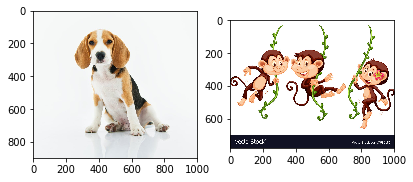

In [154]:
##dont run

plt.figure(figsize=(10,10))
for i, path in enumerate(image_paths[:2]):
    img = tf.keras.preprocessing.image.load_img(path)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.show()

In [ ]:
## to read your input file

In [4]:
def read_tfrecord(serialized_example):
    feature_description = {
        'image': tf.io.FixedLenFeature((), tf.string),
        'label': tf.io.FixedLenFeature((), tf.int64),
        'height': tf.io.FixedLenFeature((), tf.int64),
        'width': tf.io.FixedLenFeature((), tf.int64),
        'depth': tf.io.FixedLenFeature((), tf.int64)
    }

    example = tf.io.parse_single_example(serialized_example, feature_description)
    
    image = tf.io.parse_tensor(example['image'], out_type = float)
    image_shape = (example['height'], example['width'], example['depth'])
    image = tf.reshape(image, image_shape)
    
    return (image, example['height'], example['width'], example['depth'])


In [5]:
## removed label
def serialize_example_wo_label(image,height, width,depth):
    feature = {
        'image': _bytes_feature(image),
        'width': _int64_feature(width),
        'height': _int64_feature(height),
        'depth': _int64_feature(depth)
    }

    #  Create a Features message using tf.train.Example.

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [6]:
tfrecord_dir = 'indi.tfrecords' ## the input file with label

tfrecord_dataset = tf.data.TFRecordDataset(tfrecord_dir)
parsed_dataset = tfrecord_dataset.map(read_tfrecord)

plt.figure(figsize=(10,10))

tfrecord_dir = 'indi_new.tfrecords' ## the output file name
with tf.io.TFRecordWriter(tfrecord_dir) as writer:
    for i, data in enumerate(parsed_dataset.take(2)):
        img_bytes = tf.io.serialize_tensor(data[0])
        height = data[1]
        width = data[2]
        depth  = data[3]
        print(width)
        example = serialize_example_wo_label(img_bytes, height, width,depth)
        writer.write(example)

tf.Tensor(1000, shape=(), dtype=int64)
tf.Tensor(1000, shape=(), dtype=int64)


<Figure size 720x720 with 0 Axes>

In [ ]:
## the following code is to test the generated file

In [7]:
def read_test(serialized_example):
    feature_description = {
        'image': tf.io.FixedLenFeature((), tf.string),
        'height': tf.io.FixedLenFeature((), tf.int64),
        'width': tf.io.FixedLenFeature((), tf.int64),
        'depth': tf.io.FixedLenFeature((), tf.int64)
    }

    example = tf.io.parse_single_example(serialized_example, feature_description)
    
    image = tf.io.parse_tensor(example['image'], out_type = float)
    image_shape = (example['height'], example['width'], example['depth'])
    image = tf.reshape(image, image_shape)
    
    return (image, example['height'], example['width'], example['depth'])


tf.Tensor(897, shape=(), dtype=int64) tf.Tensor(1000, shape=(), dtype=int64) tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(780, shape=(), dtype=int64) tf.Tensor(1000, shape=(), dtype=int64) tf.Tensor(3, shape=(), dtype=int64)


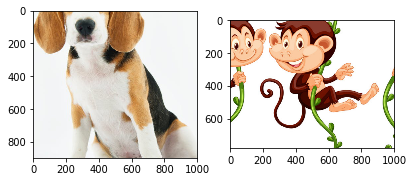

In [10]:
tfrecord_dataset = tf.data.TFRecordDataset('indi_new.tfrecords')
parsed_dataset = tfrecord_dataset.map(read_test)

plt.figure(figsize=(10,10))

for i, data in enumerate(parsed_dataset.take(9)):
    print(data[1],data[2],data[3])
    img = tf.keras.preprocessing.image.array_to_img(data[0])
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.show()